In [1]:
import os
import numpy as np
import pandas as pd
# pd.set_option('display.max_rows', 100)

import fnmatch

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from scipy import stats

import sys
sys.path.append("../")

from aeon.visualisation import plot_critical_difference

/Users/bzcschae/miniconda3/lib/python3.10/site-packages/aeon/base/__init__.py:24: FutureWarning: The aeon package will soon be releasing v1.0.0 with the removal of legacy modules and interfaces such as BaseTransformer and BaseForecaster. This will contain breaking changes. See aeon-toolkit.org for more information. Set aeon.AEON_DEPRECATION_WARNING or the AEON_DEPRECATION_WARNING environmental variable to 'False' to disable this warning.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
path = "TLB_logs/"
files = [
         "tlb_all_ucr_16_4-28-02-24.csv",
         "tlb_all_ucr_16_8-28-02-24.csv",
         "tlb_all_ucr_16_16-28-02-24.csv",
         "tlb_all_ucr_16_32-28-02-24.csv",
         "tlb_all_ucr_16_64-28-02-24.csv",
         "tlb_all_ucr_16_128-28-02-24.csv",
         "tlb_all_ucr_16_256-28-02-24.csv"]

configs = ["4", "8", "16", "32", "64", "128", "256"]
df_all = pd.DataFrame()
for i, file in enumerate(files):
    df = pd.read_csv(path + file)
    
    mapping = {"sfa_equi-depth_False": "SFA Equi-Depth", # + str(configs[i]),
               "sfa_equi-depth_True": "SFA Equi-Depth +Variance", # + str(configs[i]),
               "sfa_equi-width_False": "SFA Equi-Width", # + str(configs[i]),
               "sfa_equi-width_True": "SFA Equi-Width +Variance", # + str(configs[i]),
               "isax": "iSAX",
               }
    
    for key in mapping:
        df.Method = df.Method.replace({key: mapping[key]})
    
    df["Config"] = configs[i]    
    df_all = pd.concat([df_all, df])        

df = df_all
display(df)

,Method,Dataset,TLB,Config
0,iSAX,ArrowHead,0.006487,4
1,iSAX,ArrowHead,0.024127,4
2,iSAX,ArrowHead,0.037671,4
3,iSAX,ArrowHead,0.045388,4
4,iSAX,ArrowHead,0.059547,4
...,...,...,...,...
190475,SFA Equi-Depth,Yoga,0.958114,256
190476,SFA Equi-Depth,Yoga,0.961399,256
190477,SFA Equi-Depth,Yoga,0.964625,256
190478,SFA Equi-Depth,Yoga,0.967927,256


In [3]:
df[["Method", "TLB", "Config"]] \
        .groupby(["Method", "Config"]).median() \
        .sort_values(by=["Config", "TLB"], ascending=False)

,,TLB
Method,Config,
SFA Equi-Depth +Variance,8,0.260909
SFA Equi-Depth,8,0.253463
SFA Equi-Width +Variance,8,0.248132
SFA Equi-Width,8,0.240097
iSAX,8,0.200755
SFA Equi-Width +Variance,64,0.315456
SFA Equi-Depth +Variance,64,0.313987
SFA Equi-Width,64,0.305693
SFA Equi-Depth,64,0.304780


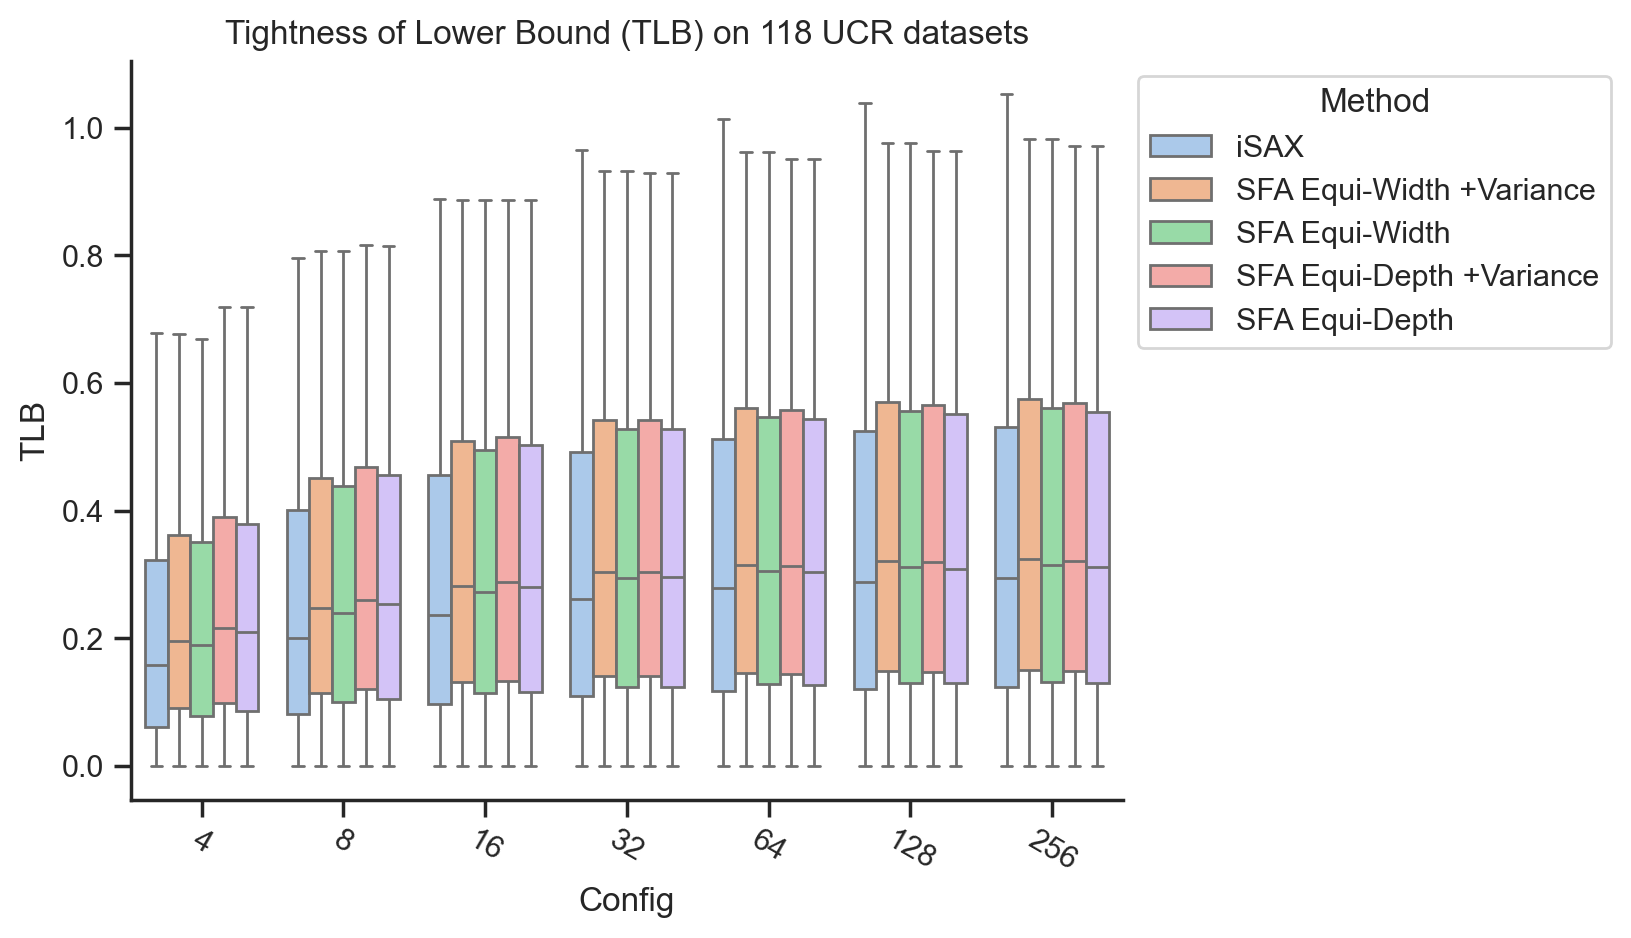

In [4]:
sns.set_theme(style="ticks", palette="pastel")

ax = sns.boxplot(
    x="Config", y="TLB", hue="Method", data=df,
    #order=df[["Config", "Method", "TLB"]] \
    #    .groupby(["Config", "Method"]).median() \
    #    .sort_values(by=["Config", "TLB"], ascending=False).reset_index().index
    )
ax.set_title("Tightness of Lower Bound (TLB) on 118 UCR datasets")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=-30)
sns.despine()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.show()
#plt.tight_layout()
plt.savefig("images/boxplot.pdf", bbox_inches='tight')

In [5]:
df[["Config", "Method", "TLB"]] \
        .groupby(["Config", "Method"]).median() \
        .sort_values(by=["Config", "TLB"], ascending=False).reset_index()[["Config", "Method"]]

,Config,Method
0,8,SFA Equi-Depth +Variance
1,8,SFA Equi-Depth
2,8,SFA Equi-Width +Variance
3,8,SFA Equi-Width
4,8,iSAX
5,64,SFA Equi-Width +Variance
6,64,SFA Equi-Depth +Variance
7,64,SFA Equi-Width
8,64,SFA Equi-Depth
9,64,iSAX


In [6]:
df_sub = df[df.Method.isin(["SFA Equi-Width +Variance", "SFA Equi-Width", "iSAX"])]
result = df_sub[["Config", "Method", "TLB"]] \
        .groupby(["Config", "Method"]).median() \
        .pivot_table(columns="Config", index="Method")
result

TLB                                          \
Config                         128        16       256        32         4   
Method                                                                       
SFA Equi-Width            0.311671  0.273512  0.314725  0.294366  0.189841   
SFA Equi-Width +Variance  0.321544  0.282636  0.324765  0.303460  0.196582   
iSAX                      0.289159  0.236252  0.294881  0.262580  0.158974   

                                              
Config                          64         8  
Method                                        
SFA Equi-Width            0.305693  0.240097  
SFA Equi-Width +Variance  0.315456  0.248132  
iSAX                      0.278504  0.200755

In [7]:
print(result.to_markdown())

| Method                   |   ('TLB', '128') |   ('TLB', '16') |   ('TLB', '256') |   ('TLB', '32') |   ('TLB', '4') |   ('TLB', '64') |   ('TLB', '8') |
|:-------------------------|-----------------:|----------------:|-----------------:|----------------:|---------------:|----------------:|---------------:|
| SFA Equi-Width           |         0.311671 |        0.273512 |         0.314725 |        0.294366 |       0.189841 |        0.305693 |       0.240097 |
| SFA Equi-Width +Variance |         0.321544 |        0.282636 |         0.324765 |        0.30346  |       0.196582 |        0.315456 |       0.248132 |
| iSAX                     |         0.289159 |        0.236252 |         0.294881 |        0.26258  |       0.158974 |        0.278504 |       0.200755 |
